# Perzeptron Lernalgorithmus (starter code)

## **1 - Imports**

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sklearn.datasets
import h5py
import scipy
from scipy import ndimage
from scipy.special import expit
from PIL import Image
import random

#%matplotlib inline


## **2 - Dataset**

In [259]:
# Generate the data points. 
# return X: array containing one data point per column : shape (2,m) 

def generate_points(m=10, seed=42):
  rng = np.random.RandomState(1)

  X = []
  for i in range(m*2):
    X.append(rng.random()*2-1)
  # --> replace with your code
  # --> You might use the numpy function "randint".

  return np.asarray(X).reshape(2,m)



In [260]:
# Generate random decision boundary
# return w: weight vector representing decision boundary, of shape (3,1)

def random_boundary(seed=2):
  rng = np.random.RandomState(seed)

  p1 = (rng.random()*2-1, rng.random()*2-1)
  p2 = (rng.random()*2-1, rng.random()*2-1)

  slope =  1 / (p1[0] - p2[0] / p1[1] - p2[1])

  w0 = p1[1]
  w1 = -slope
  w2 = 1

  return np.asarray([w0, w1, w2]).reshape(3,1)

In [261]:
# Define function that calculates predictions
# input w : weight vector chracterising perceptron model : of shape (3,1)
# input X_ext : data matrix X, extended by a row of ones : of shape (3,m)
# return predictions : sign(w.transpose * x) : of shape (1,m)


def predict(w, X_ext):
  predictions = []
  for i in range (m):
    predictions.append(w[0] + w[1]*X_ext[1, i] + X_ext[2, i])

    #print(str(X_ext[0, i]) + " " + str(X_ext[1, i]) + " -> " + str(predictions[i]))

      # w = [.5 -.5 1]

  return np.asarray(predictions).reshape(1,m)

def predictOne(w, x, y):
  return w[0] + w[1]*x + w[2]*y

In [262]:
def paint(Y):

    h = []
    for i in range (m):
        h.append([1, 0, 0] if Y[0, i] > 0 else [0, 1, 0])

    return h

In [263]:
m = 100

# Generate m random data points. X has shape (2,m)
X = generate_points(m)
# add a row of ones. X_ext has shape (3,m)
X_ext = np.vstack((np.ones((1,X.shape[1])), X))

# Generate random boundary. w has shape (3,1)
w = random_boundary(random.randint(0, 255))

# Generate labels. Y has shape (1,m)
Y = predict(w, X_ext)

Yc = paint(Y)

w

array([[0.37063437],
       [0.48383433],
       [1.        ]])

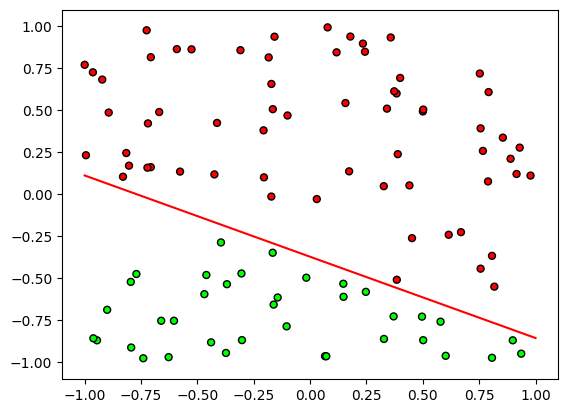

In [264]:
# Visualize the data and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], marker='o', c=Yc, s=25, edgecolor='k')

# the decision boundary chracterized by vector w
xp = np.array((-1,1))
yp = -(w[1]/w[2]) * xp - (w[0]/w[2])

plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot(xp, yp, "r-") # decision boundary
plt.show()

In [265]:
# Example of a point
index = 3
print("Point #" + str(index) + " is " + str(X[:,index]))
print("Class #" + str(index) + " is " + str(Y[0,index]))

Point #3 is [-0.39533485 -0.28546048]
Class #3 is -0.10610268517557861


## **3 - Training**

In [266]:
# Define function for weight update

# input w : current weight vector with shape (3,1)
# input x : misclassified data point (should have shape (3,1))
# input y : label of data point x (scalar)

# return new_w : updated weight vector

def weight_update(w, x, y, learning_rate):
  new_w = w
  
  # --> replace with your code


  change = learning_rate * (y - predictOne(goalW, x ,y)) * x
  new_w[0] = new_w[0] + change
  print(new_w[0])
  new_w[1] = new_w[1] + learning_rate * (y - predictOne(goalW, x, y)) * y
  new_w[2] = new_w[2] + learning_rate * (y - predictOne(goalW, x ,y))

  print(change)
  print(new_w)


  #  w := w + α ( y ( i ) − h ( x ( i ) ) ) x ( i )

  new_w = np.reshape(new_w, (3,1))
  return new_w

In [267]:
def calcMissed(Y, X_ext, goalW):
    missed = []
    for i in range (m):
        if Y[0, i] > 0 != predictOne(goalW, X_ext[0, i], X_ext[1, i])[0] > 0:
            #print(str(Y[0, i]) + " != " + str(predictOne(goalW, X_ext[0, i], X_ext[1, i])))
            missed.append((X_ext[0, i], X_ext[1, i]))
        #print(str(Y[0, i]) + " == " + str(predictOne(goalW, X_ext[0, i], X_ext[1, i])[0]))
    return missed

In [268]:
# Initialize weight vector w_ with 0. 
# --> replace with your code

goalW = random_boundary(random.randint(0, 255))

w_ = [float(0),float(0),float(0)]

w_ = np.reshape(w_, (3,1))
learning_rate = 0.1
num_iterations = 10

# initialize array to save number of misclassified points in each iteration
num_misses = np.zeros(num_iterations)

for i in range(num_iterations):
  # calculate predictions for all points
  Y = predict(w, X_ext)

  # identify indices of misclassified points
  wrong = calcMissed(Y, X_ext, goalW)

  # calculate and save number of misclassified points
  # break if there are none
  cWrong = len(wrong)
  print(cWrong)
  #print(w_)

  if (cWrong == 0):
      break

  # select random misclassified index
  point = random.choice(wrong)

  # perform one weight update using datapoint at selected index
  ahhhh = weight_update(w_, point[0], point[1], learning_rate)
  #print(ahhhh)
  w_ = ahhhh
  pass

1
[0.09415287]
[0.09415287]
[[0.09415287]
 [0.09205535]
 [0.09415287]]
1
[0.18830574]
[0.09415287]
[[0.18830574]
 [0.1841107 ]
 [0.18830574]]
1
[0.28245861]
[0.09415287]
[[0.28245861]
 [0.27616605]
 [0.28245861]]
1
[0.37661148]
[0.09415287]
[[0.37661148]
 [0.36822139]
 [0.37661148]]
1
[0.47076435]
[0.09415287]
[[0.47076435]
 [0.46027674]
 [0.47076435]]
1
[0.56491722]
[0.09415287]
[[0.56491722]
 [0.55233209]
 [0.56491722]]
1
[0.65907009]
[0.09415287]
[[0.65907009]
 [0.64438744]
 [0.65907009]]
1
[0.75322296]
[0.09415287]
[[0.75322296]
 [0.73644279]
 [0.75322296]]
1
[0.84737583]
[0.09415287]
[[0.84737583]
 [0.82849814]
 [0.84737583]]
1
[0.9415287]
[0.09415287]
[[0.9415287 ]
 [0.92055349]
 [0.9415287 ]]
